In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import scipy.sparse as sp

In [3]:
def generate_the_laplace_matrix_with_size(N=128):
    """
    assume sqrt(N) is an integer. Generate the Laplace matrix with size N

    """
    nsq = N * N
    A = np.zeros((nsq, nsq))
    A = _kernel(N, nsq, A)
    
    return A
    
@numba.jit(nopython=True)
def _kernel(N, nsq, A):
    for i in range(nsq):
        for j in range(nsq):
            if i == j:
                A[i, j] = 4
            elif (i == j + N or i == j - N):
                A[i, j] = -1
            elif (i == j + 1 or i == j - 1):
                if (((i + 1) % N == 0 and (j % N == 0)) or ((i % N == 0 and ((j + 1) % N == 0)))) and i != 0 and j != 0:
                    A[i, j] = 0
                else:
                    A[i, j] = -1
            else:
                A[i, j] = 0

    return A

In [4]:
def generate_rho(N=128, xmin=-5, xmax=5, ymin=-5,ymax=5):
    # TODO:
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)

    xx,yy  = np.meshgrid(x, y, indexing='ij')
    r1 = (xx + 1.5)**2 + yy**2
    r2 = (xx - 1.5)**2 + yy**2
    rho = np.exp(-5 / 4 * r1**2) + 3 / 2 * np.exp(-r2**2)
    
    return xx, yy, rho

def generate_the_rhs_vector_with_size(rho):
    
    bb = rho.flatten()
    
    return bb

In [5]:
N = 128

A = generate_the_laplace_matrix_with_size(N)

xx, yy, rho = generate_rho(N)
b = generate_the_rhs_vector_with_size(rho)


In [6]:
# print(A.shape)
print(b.shape)
print(rho.shape)

(16384,)
(128, 128)


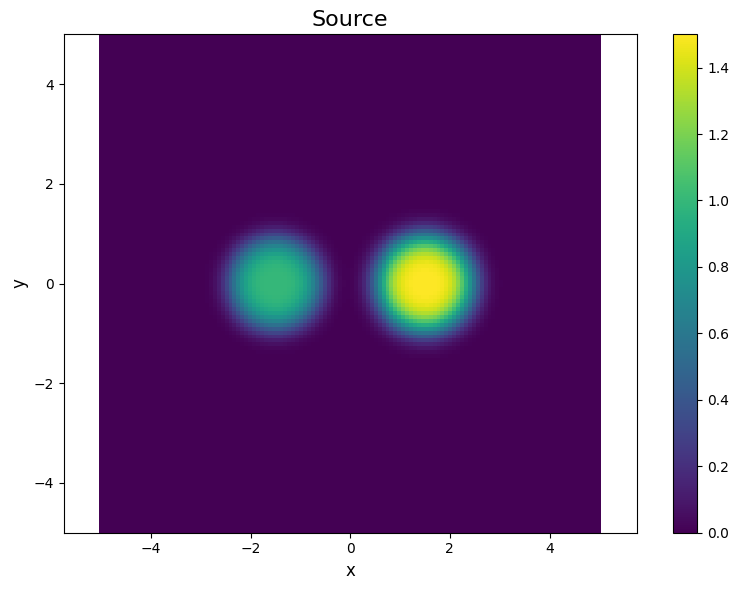

In [25]:
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, rho)
plt.colorbar()
# plt.contour(xx, yy, rho, colors='w')
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Source', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.tight_layout()
plt.savefig('source.png')
plt.show()

In [8]:

x = sp.linalg.spsolve(A, b)



/var/folders/j1/hyd9nr6j5rj206vbv9nyjjcc0000gn/T/ipykernel_8930/4124838160.py:1: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = sp.linalg.spsolve(A, b)


In [9]:
u = x.reshape(N, N)


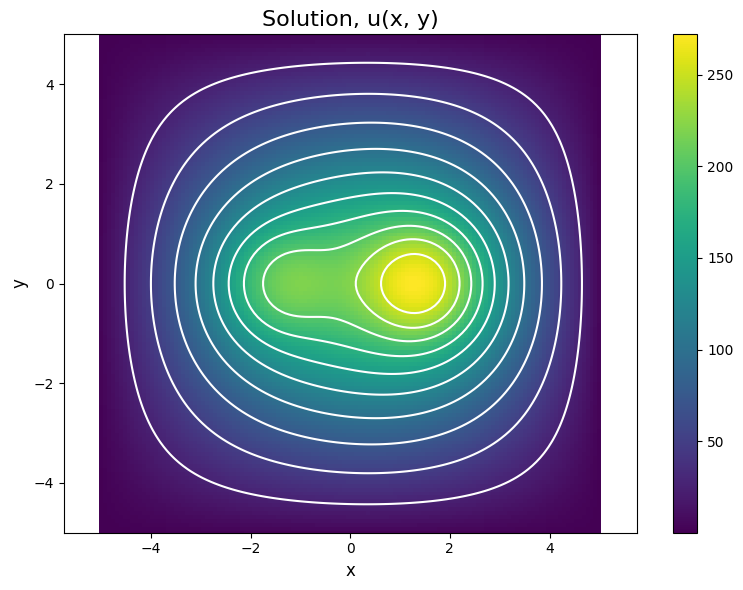

In [14]:
plt.figure(2, figsize=(8, 6))
plt.pcolormesh(xx, yy, u)
plt.colorbar()
plt.contour(xx, yy, u, 10, colors="w")
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Solution, u(x, y)', fontsize=16)
plt.tight_layout()
plt.savefig('sol.png')
plt.show()